In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,NaN,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.1785,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,NaN,0.50153,2.470900,3.06500,1.567600,1.4824,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.5957,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.2711,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.0747,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.2887,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.5370,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.4243,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4
float64		column 2	8
float64		column 3	6
float64		column 4	4
float64		column 5	14
float64		column 6	8
float64		column 7	4
float64		column 8	6
float64		column 9	6
float64		column 10	4
float64		column 11	4
float64		column 12	4


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,796.000000,792.000000,794.000000,796.000000,786.000000,792.000000,796.000000,794.000000,794.000000,796.000000,796.000000,796.000000
mean,1.505253,1.249946,1.982701,1.930013,1.985244,1.999644,1.953607,2.001389,1.997331,1.990253,1.959015,1.963137
std,2.745132,3.633356,1.144184,1.163009,1.166232,1.140649,1.167421,1.135748,1.141267,1.151743,1.182549,1.124423
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.426255,-0.961645,1.021200,0.926915,0.975450,0.988268,0.949470,0.981097,1.059775,1.033350,0.891135,0.990685
50%,0.969530,0.564195,1.968150,1.895400,2.021450,1.997250,1.948000,2.007400,1.994150,2.000450,1.947500,1.950200
75%,3.972450,4.479200,2.926225,2.929175,2.969600,3.008400,2.962250,2.930300,3.002575,2.991525,3.028400,2.869100
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

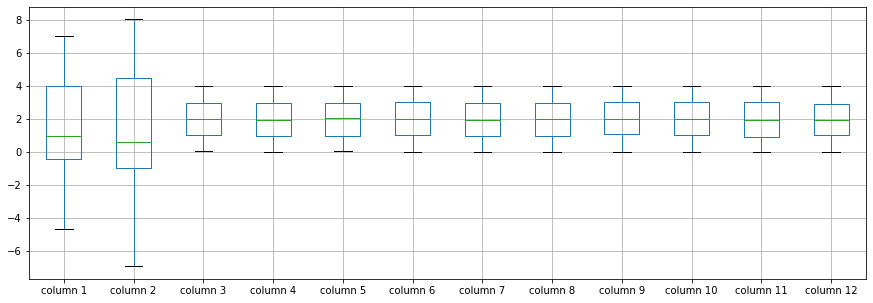

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.505253
column 2     1.249946
column 3     1.982701
column 4     1.930013
column 5     1.985244
column 6     1.999644
column 7     1.953607
column 8     2.001389
column 9     1.997331
column 10    1.990253
column 11    1.959015
column 12    1.963137
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.435142,-0.018709,0.006904,0.041014,0.052595,-0.006879,0.020499,-0.005740,0.013579,0.026499,0.027379
column 2,-0.435142,1.000000,-0.017623,-0.022949,-0.026166,-0.021735,0.037095,-0.013834,-0.007913,-0.036907,-0.085893,0.030531
column 3,-0.018709,-0.017623,1.000000,-0.041919,0.078216,-0.012152,0.031216,-0.003488,-0.004411,-0.005310,-0.028991,0.005081
column 4,0.006904,-0.022949,-0.041919,1.000000,0.005074,-0.041530,0.031109,0.043615,-0.023430,0.044616,0.044566,-0.010642
column 5,0.041014,-0.026166,0.078216,0.005074,1.000000,0.040608,0.026861,0.017114,-0.015139,-0.006002,0.006366,0.010669
column 6,0.052595,-0.021735,-0.012152,-0.041530,0.040608,1.000000,-0.070268,0.048045,0.025792,0.004788,-0.032096,0.003386
column 7,-0.006879,0.037095,0.031216,0.031109,0.026861,-0.070268,1.000000,-0.044367,-0.019987,-0.045085,-0.014725,-0.010582
column 8,0.020499,-0.013834,-0.003488,0.043615,0.017114,0.048045,-0.044367,1.000000,-0.057032,-0.053762,0.007750,-0.040680
column 9,-0.005740,-0.007913,-0.004411,-0.023430,-0.015139,0.025792,-0.019987,-0.057032,1.000000,0.050248,-0.010815,-0.022681
column 10,0.013579,-0.036907,-0.005310,0.044616,-0.006002,0.004788,-0.045085,-0.053762,0.050248,1.000000,-0.066578,0.051401


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+35,12+35+35,12+35+35+35,12+35+35+35+35,12+35+35+35+35+35,12+35+35+35+35,12+35+35+35,12+35+35,12+35,12], vae_layer = False, seed = 60)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 29.373309631347656
Epoch: 1 , loss: 29.203322372436524
Epoch: 2 , loss: 28.904148788452147
Epoch: 3 , loss: 27.361797752380372
Epoch: 4 , loss: 25.872669830322266
Epoch: 5 , loss: 25.114632453918457
Epoch: 6 , loss: 24.292165451049804
Epoch: 7 , loss: 23.80771728515625
Epoch: 8 , loss: 23.36686840057373
Epoch: 9 , loss: 23.08967555999756
Epoch: 10 , loss: 22.68070743560791
Epoch: 11 , loss: 22.198671226501464
Epoch: 12 , loss: 21.92722106933594
Epoch: 13 , loss: 21.853227424621583
Epoch: 14 , loss: 21.40745994567871
Epoch: 15 , loss: 21.301027946472168
Epoch: 16 , loss: 21.169466705322264
Epoch: 17 , loss: 20.978583793640137
Epoch: 18 , loss: 20.82177028656006
Epoch: 19 , loss: 20.411203804016115
Epoch: 20 , loss: 20.530005912780762
Epoch: 21 , loss: 20.609477043151855
Epoch: 22 , loss: 20.356576766967773
Epoch: 23 , loss: 20.41933204650879
Epoch: 24 , loss: 20.211631965637206
Epoch: 25 , loss: 20.2074

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.00000,0.0,0.0,0.0,0.0,1.515349,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,1.96448,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
796,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
797,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
798,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(19.294906985121177, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.07773245862185542

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,2.194429,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.178500,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,1.795020,0.50153,2.470900,3.06500,1.567600,1.482400,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.595700,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.271100,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.074700,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.288700,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.537000,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.424300,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NW_1(imp).xlsx", index=False, header=False)